# Loading the Dataset

In [103]:
import pandas as pd
df = pd.read_csv('heart.csv')

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,no,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,no,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,no,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [104]:
#Dropping the race columns as they are not needed for the model to avoid biases
df = df.drop(columns=['Race'])
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,yes,No,No,3.0,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,no,No,Yes,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No,No
2,No,26.58,yes,No,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,no,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No,No,Yes
4,No,23.71,no,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No,No


# Data Cleaning (Filling Null Values)

**Checking Null Values**

In [105]:

null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

BMI               150
PhysicalHealth    120
SleepTime         100
dtype: int64


**Determining BMI column's skewedness**

We Identify if BMI is highly skewed or not. By knowing that, we can decide whether to fill it with mean or median.

**BMI Histogram**

From the graph below, we can see that it is indeed skewed.

<Axes: >

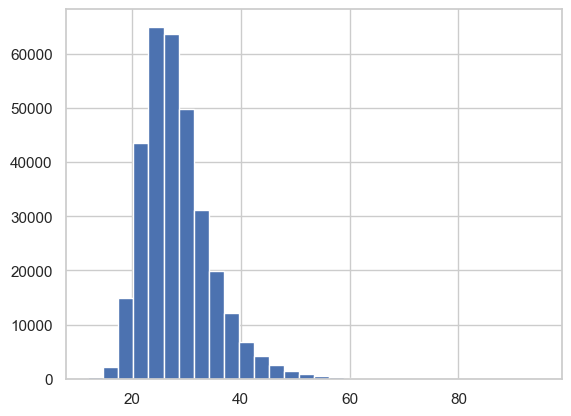

In [59]:
df['BMI'].hist(bins=30)


**BMI is highly skewed**
the code below shows the skewedness of the column. > ±1 means that it is Highly skewed. Since it is, we will use median to fill this column

In [60]:
import pandas as pd

df['BMI'].skew()



1.3321648262016668

**Fill the BMI column with its median**

Since there are outliers in this column and that it is highly skewed, I think median is more fitting to fill missing values

In [106]:
bmi_median = df['BMI'].median()
df['BMI'].fillna(bmi_median, inplace=True)

C:\Users\Ael Cee\AppData\Local\Temp\ipykernel_17688\3121382399.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].fillna(bmi_median, inplace=True)


**PhysicalHealth distribution graph**
The graph below shows physical health distribution to get a view of its skewedness. However, from the looks of it, there are way too many zeros. Thus, an outlier exists.

<Axes: >

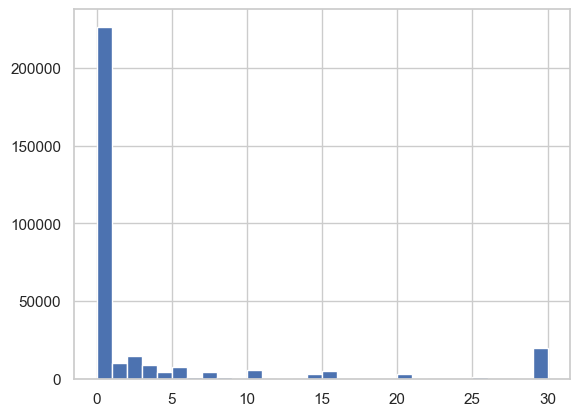

In [62]:

# Plotting the distribution of PhysicalHealth to visualize skewedness
df['PhysicalHealth'].hist(bins=30)


**Skewedness**

Below is PhysicalHealth's skewness. Since 0 is rediculously high compared to other values, the skewedness is very high on this column.

In [63]:
#compute skewness of PhysicalHealth
df['PhysicalHealth'].skew()

2.604312162603217

**Fill missing PhysicalHealth with median**

Since skewness is very high, it is not fitting to use mean to fill missing values. Therefore we will fill it with the column's median

In [107]:
df['PhysicalHealth'].fillna(df['PhysicalHealth'].median(), inplace=True)

C:\Users\Ael Cee\AppData\Local\Temp\ipykernel_17688\1420530889.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PhysicalHealth'].fillna(df['PhysicalHealth'].median(), inplace=True)


**SleepTime Histogram**

The histogram below visualizes the distribution of the SleepTime column, helping us assess its skewness and identify potential outliers.


<Axes: >

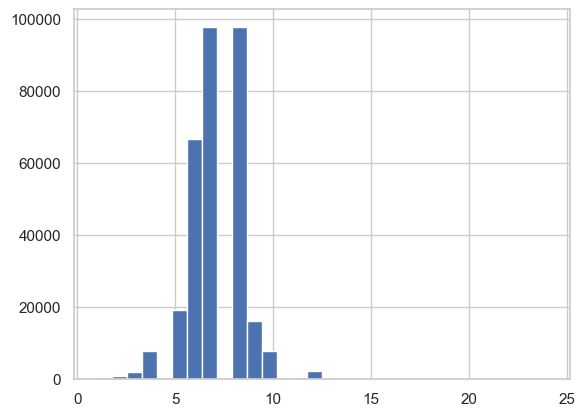

In [65]:
# Plotting the distribution of SleepTime to visualize skewedness
df['SleepTime'].hist(bins=30)

**SleepTime Skewness**

SleepTime is skewed to the right. But it is not as high as other two columns. Also, there are outliers but none are extreme from the looks of the graph. Its skewness is less than positive or negative one, thus we can use the mean to fill missing values in SleepTime, as it is less affected by outliers in this case.

In [66]:
# Compute SleepTime skewness
df['SleepTime'].skew()

0.6790370458400766

**SleepTime mean and median comparison**

The mean and median values for SleepTime are very close (Mean: 7.10, Median: 7.0). This indicates that the distribution of SleepTime is approximately symmetric with only mild skewness. Therefore, using the mean to fill missing values in SleepTime is appropriate, as it is not significantly affected by outliers in this case.

In [108]:

# Comparing sleeptime mean and median
sleep_timee_mean = df['SleepTime'].mean()
sleep_timee_median = df['SleepTime'].median()
print(f"SleepTime Mean: {sleep_timee_mean}, SleepTime Median: {sleep_timee_median}")

SleepTime Mean: 7.097133205086098, SleepTime Median: 7.0


**Fill Missing SleepTime with Mean**

In [109]:
df['SleepTime'].fillna(sleep_timee_mean, inplace=True)

C:\Users\Ael Cee\AppData\Local\Temp\ipykernel_17688\3682283788.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SleepTime'].fillna(sleep_timee_mean, inplace=True)


**Check if there still columns that has null values**

From the looks of it, there are no more columns with null values

In [69]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [70]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,yes,No,No,3.0,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,no,No,Yes,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No,No
2,No,26.58,yes,No,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,no,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No,No,Yes
4,No,23.71,no,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No,No


# Convert Text to Numerical Values

**Convert 'Yes/yes' and 'No/no' to 1 and 0**

*HeartDisease column*

In [110]:
#Checking the unique values in the HeartDisease column
df['HeartDisease'].unique()


array(['No', 'Yes'], dtype=object)

In [111]:
#Convert Yes and No to 1 and 0 in the HeartDisease column
df['HeartDisease'] = df['HeartDisease'].map({'No': 0, 'Yes': 1})

In [112]:
#Unique values after conversion
df['HeartDisease'].unique()

array([0, 1], dtype=int64)

*Smoking column*

In [113]:
#Checking the unique values in the Smoking column
df['Smoking'].unique()
df['Smoking'].value_counts()

Smoking
no     187887
yes    131908
Name: count, dtype: int64

In [114]:
# Convert yes and no to 1 and 0 in the Smoking column
df['Smoking'] = df['Smoking'].map({'no': 0, 'yes': 1})

In [115]:
# Unique values after conversion
df['Smoking'].unique()
df['Smoking'].value_counts()

Smoking
0    187887
1    131908
Name: count, dtype: int64

*AlchoholDrinking column*

In [116]:
#Checking the unique values in the AlcoholDrinking column
df['AlcoholDrinking'].unique()
df['AlcoholDrinking'].value_counts()

AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64

In [117]:
# Convert yes and no to 1 and 0 in the Smoking column
df['AlcoholDrinking'] = df['AlcoholDrinking'].map({'No': 0, 'Yes': 1})

In [119]:
#Checking the unique values in the AlcoholDrinking column
df['AlcoholDrinking'].unique()
df['AlcoholDrinking'].value_counts()

AlcoholDrinking
0    298018
1     21777
Name: count, dtype: int64

In [120]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

['Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


*Convert Many at Once*

Converting text to numerical in each column one by one will take a while especially with a lot of columns. Thus we will try to look for those columns that have yes or no values then convert them to numerical by running a code in a single cell

In [121]:
# Loop through each categorical column and display unique values and value counts
for col in categorical_cols:
    print(f"**{col} column**\n")
    print(f"# Checking the unique values in the {col} column")
    print(df[col].unique())
    print(df[col].value_counts())
    print("\n")

**Stroke column**

# Checking the unique values in the Stroke column
['No' 'Yes']
Stroke
No     307726
Yes     12069
Name: count, dtype: int64


**DiffWalking column**

# Checking the unique values in the DiffWalking column
['No' 'Yes']
DiffWalking
No     275385
Yes     44410
Name: count, dtype: int64


**Sex column**

# Checking the unique values in the Sex column
['Female' 'Male']
Sex
Female    167805
Male      151990
Name: count, dtype: int64


**AgeCategory column**

# Checking the unique values in the AgeCategory column
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64


**Diabetic column**

# Checking the unique 

From the results above, it seems we will not include Diabetic column in converting yes and no to 1 and 0 since it has more than two categories, namely: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'].

In [122]:
# Convert 'yes/Yes' and 'no/No' to 1 and 0 for relevant columns except 'Diabetic'
yes_no_columns = [
    'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
    'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'
]

for col in yes_no_columns:
    df[col] = df[col].replace({'yes': 1, 'Yes': 1, 'no': 0, 'No': 0})

C:\Users\Ael Cee\AppData\Local\Temp\ipykernel_17688\4169169865.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'yes': 1, 'Yes': 1, 'no': 0, 'No': 0})


In [123]:
# The code below will display the first few rows of the DataFrame with the updated yes_no_columns
df[yes_no_columns].head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,1,0,0,0,1,1,0,1
1,0,0,1,0,1,0,0,0
2,1,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0


**Mapping Diabetic Column to Numerical Values**

The Diabetic column has four categories. We map them as follows for modeling:

- 'No' → 0  
- 'Yes' → 1  
- 'No, borderline diabetes' → 2  
- 'Yes (during pregnancy)' → 3


In [124]:
# Diabetic column before mapping
df['Diabetic'].unique()
df['Diabetic'].value_counts()

Diabetic
No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: count, dtype: int64

In [125]:
# Map Diabetic column to numerical values
df['Diabetic'] = df['Diabetic'].map({
    'No': 0,
    'Yes': 1,
    'No, borderline diabetes': 2,
    'Yes (during pregnancy)': 3
})

In [126]:
# Diabetic column after mapping
df['Diabetic'].unique()
df['Diabetic'].value_counts()

Diabetic
0    269653
1     40802
2      6781
3      2559
Name: count, dtype: int64

Let us see the remaining columns with categorical values below:

In [128]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Loop through each categorical column and display unique values and value counts
for col in categorical_cols:
    print(f"**{col} column**\n")
    print(f"# Checking the unique values in the {col} column")
    print(df[col].unique())
    print(df[col].value_counts())
    print("\n")

**Sex column**

# Checking the unique values in the Sex column
['Female' 'Male']
Sex
Female    167805
Male      151990
Name: count, dtype: int64


**AgeCategory column**

# Checking the unique values in the AgeCategory column
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64


**GenHealth column**

# Checking the unique values in the GenHealth column
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
GenHealth
Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: count, dtype: int64




**Converting 'Male' and 'Female' to '1' and '0' in Sex Column**

In [129]:
# Convert 'Male' to 1 and 'Female' to 0 in the Sex column
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

In [130]:
# Sex column after conversion
df['Sex'].value_counts()

Sex
0    167805
1    151990
Name: count, dtype: int64

**Mapping AgeCategory Column to Numerical Values**

The AgeCategory column has many categories. This mapping transformation allows machine learning algorithms to interpret the ordinal relationship between the age categories.

We map them as follows for modeling:



In [131]:
# Define the order of age categories
age_order = [
    '18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
    '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'
]

# Convert AgeCategory to ordered categorical type, then to integer codes
df['AgeCategory'] = pd.Categorical(df['AgeCategory'], categories=age_order, ordered=True)
df['AgeCategory'] = df['AgeCategory'].cat.codes

In [132]:
# AgeCategory after conversion  
df['AgeCategory'].value_counts()

AgeCategory
9     34151
8     33686
10    31065
7     29757
6     25382
12    24153
5     21791
11    21482
0     21064
4     21006
3     20550
2     18753
1     16955
Name: count, dtype: int64

Let's see if there are still columns with categorical values  left:

In [133]:
# Display columns that still have categorical (object) values
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Remaining categorical columns:", categorical_cols)
df[categorical_cols].head()

Remaining categorical columns: ['GenHealth']


,GenHealth
0,Very good
1,Very good
2,Fair
3,Good
4,Very good



**Check for Remaining Categorical Columns**



In [134]:
# Display columns that still have categorical (object) values
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Remaining categorical columns:", categorical_cols)
df[categorical_cols].head()

Remaining categorical columns: ['GenHealth']


,GenHealth
0,Very good
1,Very good
2,Fair
3,Good
4,Very good


**Mapping GenHealth Column to Numerical Values**

The `GenHealth` column contains categorical values describing general health status. To use this feature in modeling, we map its categories to integers as follows:

- 'Poor' → 0  
- 'Fair' → 1  
- 'Good' → 2  
- 'Very good' → 3  
- 'Excellent' → 4

This transformation allows machine learning algorithms to interpret the ordinal relationship between the categories.

In [135]:
# Handle GenHealth Column by mapping values to integers
genhealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}
df['GenHealth'] = df['GenHealth'].map(genhealth_mapping)

In [136]:

df['GenHealth'].head()

0    3
1    3
2    1
3    2
4    3
Name: GenHealth, dtype: int64

In [137]:
df['GenHealth'].value_counts()

GenHealth
3    113858
2     93129
4     66842
1     34677
0     11289
Name: count, dtype: int64

In [138]:
# Display columns that still have categorical (object) values
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of remaining categorical columns
if len(categorical_cols) > 0:
    print("Remaining categorical columns:", categorical_cols)
    # Show the first few rows of these columns for inspection
    print(df[categorical_cols].head())
else:
    print("Remaining categorical columns: None")

Remaining categorical columns: None


In [139]:
# DataFrame after all the transformations
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0,1,3,8.0,0,0,0


# Feature Scaling

**Identify which columns to implement feature scaling**

In [140]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler



def identify_scaling_needs(df, threshold=0.1):
   
    scaling_info = {}
    
    for col in df.columns:
        # Skip non-numeric columns
        if not np.issubdtype(df[col].dtype, np.number):
            continue
            
        # Calculate statistics
        col_mean = df[col].mean()
        col_std = df[col].std()
        col_min = df[col].min()
        col_max = df[col].max()
        unique_values = df[col].nunique()
        
        # Check if binary (0/1 or similar)
        is_binary = unique_values <= 2 and set(df[col].unique()).issubset({0, 1})
        
        # Calculate coefficient of variation (std/mean)
        # Handle division by zero for constant columns
        cov = col_std / col_mean if col_mean != 0 else 0
        
        # Determine if scaling is recommended
        needs_scaling = (not is_binary and 
                        (cov > threshold or  # High variability
                         (col_max - col_min) > 10))  # Wide range
        
        scaling_info[col] = {
            'mean': col_mean,
            'std': col_std,
            'min': col_min,
            'max': col_max,
            'range': col_max - col_min,
            'cov': cov,
            'unique_values': unique_values,
            'is_binary': is_binary,
            'needs_scaling': needs_scaling
        }
    
    return scaling_info

# Get scaling recommendations
scaling_recommendations = identify_scaling_needs(df)

# Convert to DataFrame for better visualization
scaling_df = pd.DataFrame(scaling_recommendations).T
scaling_df['needs_scaling'] = scaling_df['needs_scaling'].astype(bool)

# Display results
print("Columns that need scaling:")
display(scaling_df[scaling_df['needs_scaling']])

print("\nColumns that DON'T need scaling:")
display(scaling_df[~scaling_df['needs_scaling']])

Columns that need scaling:


,mean,std,min,max,range,cov,unique_values,is_binary,needs_scaling
BMI,28.324996,6.354471,12.02,94.85,82.83,0.224341,3604,False,True
PhysicalHealth,3.369824,7.948593,0.0,30.0,30.0,2.358756,31,False,True
MentalHealth,3.898366,7.955235,0.0,30.0,30.0,2.040659,31,False,True
AgeCategory,6.514536,3.564759,0,12,12,0.547201,13,False,True
Diabetic,0.194002,0.496776,0,3,3,2.560671,4,False,True
GenHealth,2.595028,1.042918,0,4,4,0.401891,5,False,True
SleepTime,7.097133,1.435851,1.0,24.0,23.0,0.202314,25,False,True



Columns that DON'T need scaling:


,mean,std,min,max,range,cov,unique_values,is_binary,needs_scaling
HeartDisease,0.085595,0.279766,0,1,1,3.26847,2,True,False
Smoking,0.412477,0.492281,0,1,1,1.193475,2,True,False
AlcoholDrinking,0.068097,0.251912,0,1,1,3.699329,2,True,False
Stroke,0.03774,0.190567,0,1,1,5.049486,2,True,False
DiffWalking,0.13887,0.345812,0,1,1,2.490178,2,True,False
Sex,0.475273,0.499389,0,1,1,1.050741,2,True,False
PhysicalActivity,0.775362,0.417344,0,1,1,0.538257,2,True,False
Asthma,0.134061,0.340718,0,1,1,2.541519,2,True,False
KidneyDisease,0.036833,0.188352,0,1,1,5.113675,2,True,False
SkinCancer,0.093244,0.290775,0,1,1,3.118424,2,True,False


From the results above, it shows columns that need scaling:
    
- BMI
- PhysicalHealth
- MentalHealt
- AgeCategory
- Diabetic
- GenHealth
- SleepTime

However, there are columns there that are not fit for feature scaling. Namely: AgeCategory, Diabetic, GenHealth and SleepTime. These columns may have numerical values that has a huge gap in scale with other columns, however, they are originally categorical. The numeric values they have are not real representation of numbers but of a category (e.g. 0='poor', 1='fair' in GenHealth column). Thus what we are left with for feature scaling are:

- BMI
- PhysicalHealth
- MentalHealth
- SleepTime


**Import Required Libraries**

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Set style for better visualization
sns.set(style="whitegrid")

**Load and Prepare Data**

In [142]:


# Select the features to scale
features_to_scale = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Create a copy of the original data for comparison
original_features = df[features_to_scale].copy()

**Normalization (Min-Max Scaling)**

In [143]:
# Initialize MinMaxScaler
scaler_minmax = MinMaxScaler()

# Fit and transform the selected features
df_normalized = df.copy()
df_normalized[features_to_scale] = scaler_minmax.fit_transform(df[features_to_scale])

# Show summary statistics after normalization
print("\nAfter Normalization:")
display(df_normalized[features_to_scale].describe().round(2))


After Normalization:


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.00,319795.00,319795.00,319795.00
mean,0.20,0.11,0.13,0.27
std,0.08,0.26,0.27,0.06
min,0.00,0.00,0.00,0.00
25%,0.14,0.00,0.00,0.22
50%,0.18,0.00,0.00,0.26
75%,0.23,0.07,0.10,0.30
max,1.00,1.00,1.00,1.00


 **Before vs After Scaling**

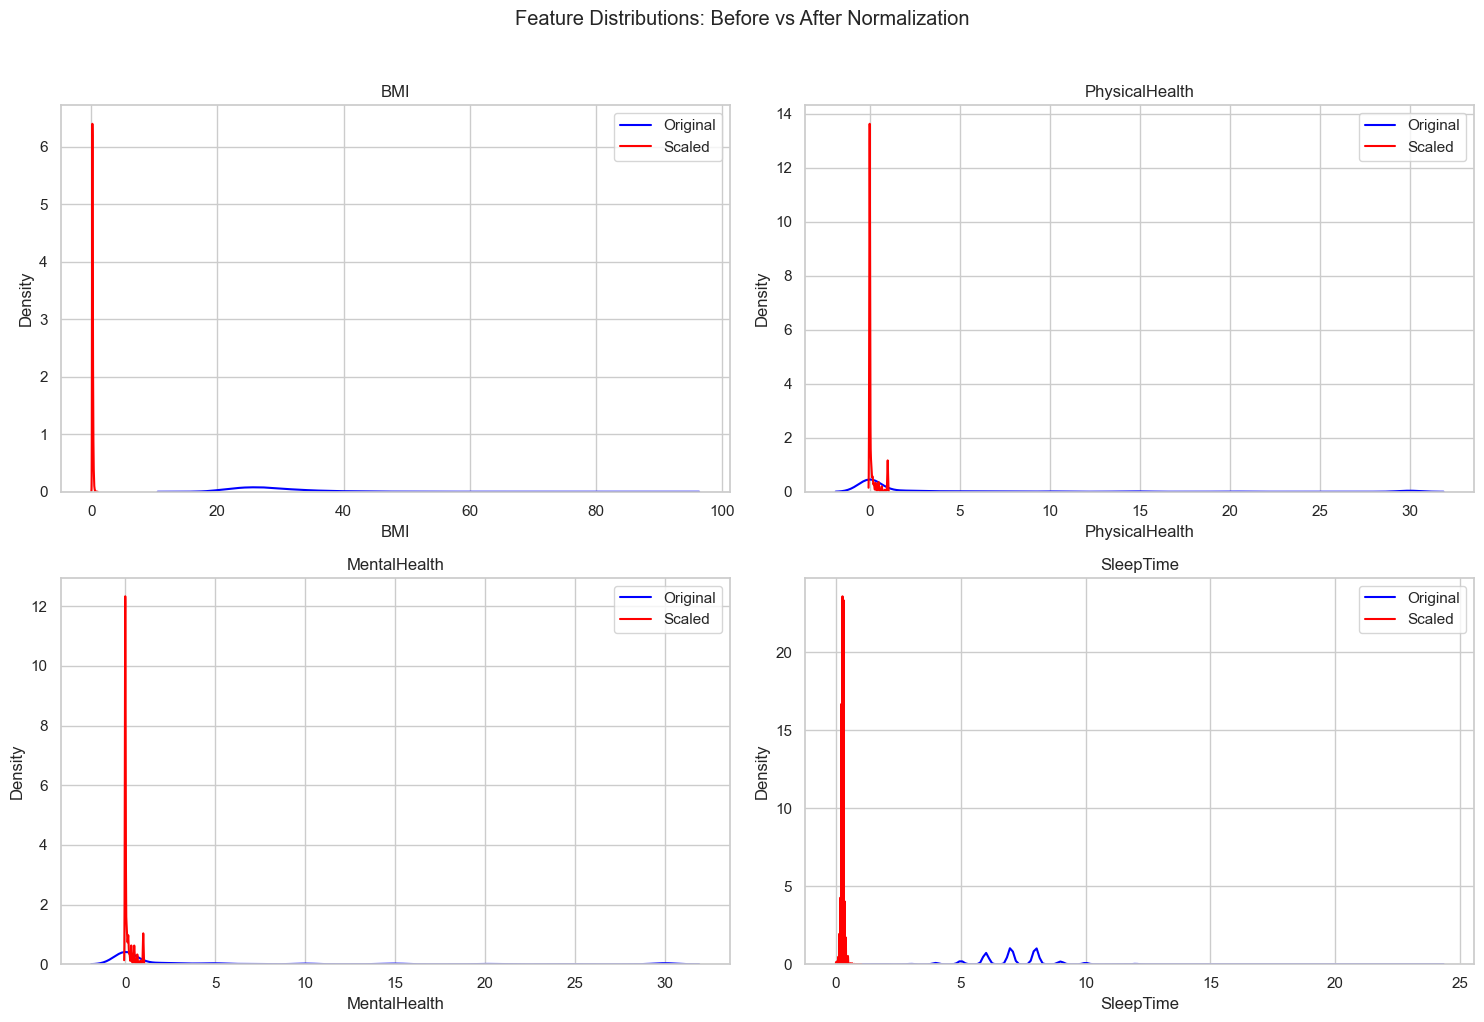

In [144]:
def plot_scaling_comparison(original, scaled, title):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(features_to_scale, 1):
        plt.subplot(2, 2, i)
        sns.kdeplot(original[col], label='Original', color='blue')
        sns.kdeplot(scaled[col], label='Scaled', color='red')
        plt.title(col)
        plt.legend()
    plt.suptitle(title, y=1.02)
    plt.tight_layout()
    plt.show()



# Plot normalization comparison
plot_scaling_comparison(original_features, df_normalized[features_to_scale], 
                       "Feature Distributions: Before vs After Normalization")

In [147]:
# Saving normalized data to a new CSV file just in case
df_normalized.to_csv('normalized_data.csv', index=False)
# Load CSV file
df_processed = pd.read_csv('normalized_data.csv')

**Data Preparation**

In [148]:


# Final feature/target separation
X = df_processed.drop('HeartDisease', axis=1)  # All features except target
y = df_processed['HeartDisease']  # Target variable

# Check class balance
print("\nClass distribution:")
print(y.value_counts(normalize=True))


Class distribution:
HeartDisease
0    0.914405
1    0.085595
Name: proportion, dtype: float64


**Address Class Imbalance (If Needed)**

In [14]:
from imblearn.over_sampling import SMOTE

# Only apply if significant imbalance exists (e.g., <30% in minority class)
if y.mean() < 0.3 or y.mean() > 0.7:
    print("\nApplying SMOTE to balance classes...")
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    print("New class distribution:", pd.Series(y_resampled).value_counts(normalize=True))
else:
    X_resampled, y_resampled = X.copy(), y.copy()
    print("\nClasses are reasonably balanced - proceeding without resampling")


Applying SMOTE to balance classes...
New class distribution: HeartDisease
0    0.5
1    0.5
Name: proportion, dtype: float64


**Train-Test Split with Stratification**

In [15]:
from sklearn.model_selection import train_test_split

# Split with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, 
    test_size=0.2, 
    random_state=42,
    stratify=y_resampled
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 467875 samples
Test set: 116969 samples


**Model Selection & Training**

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize models with some basic parameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1])), 
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
        }

# Train all models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained")

Logistic Regression trained
Random Forest trained
XGBoost trained
Gradient Boosting trained
KNN trained


**Comprehensive Model Evaluation**


Evaluating Logistic Regression


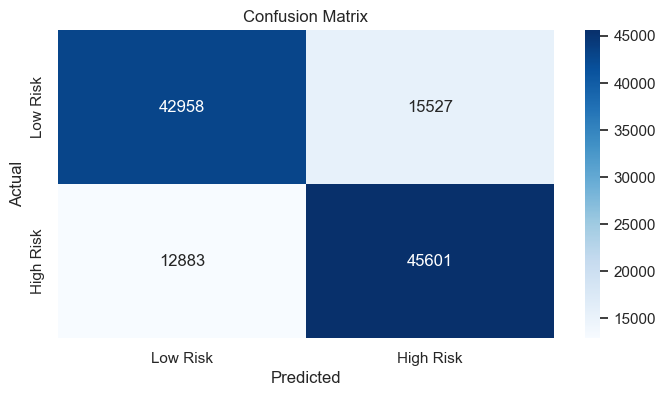

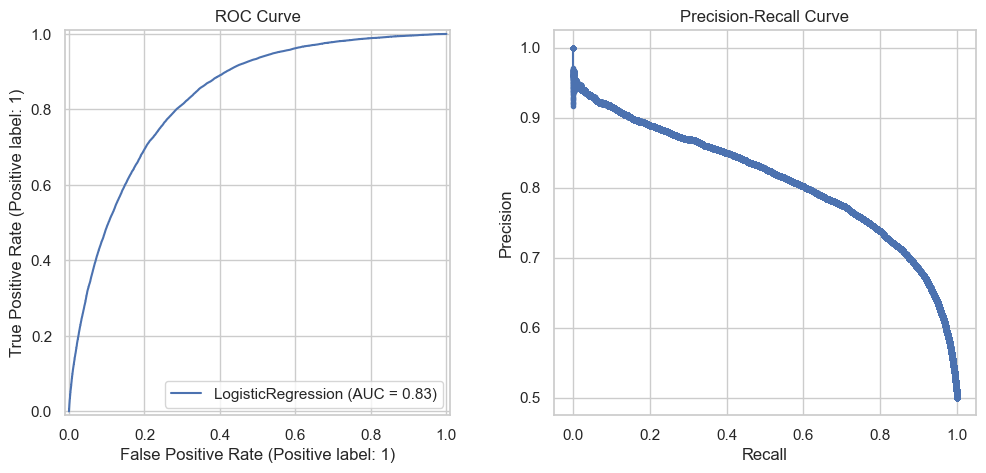


Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.77      0.73      0.75     58485
   High Risk       0.75      0.78      0.76     58484

    accuracy                           0.76    116969
   macro avg       0.76      0.76      0.76    116969
weighted avg       0.76      0.76      0.76    116969


Evaluating Random Forest


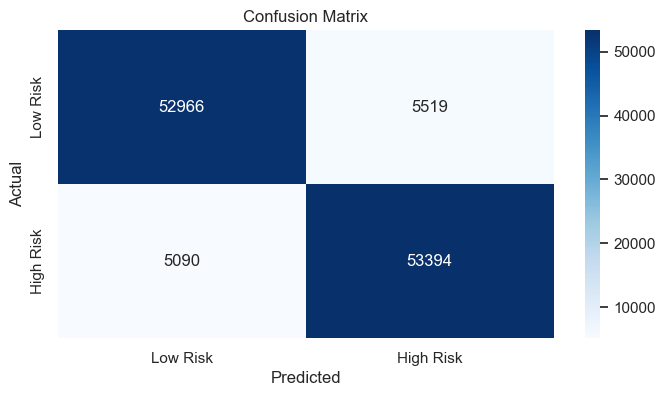

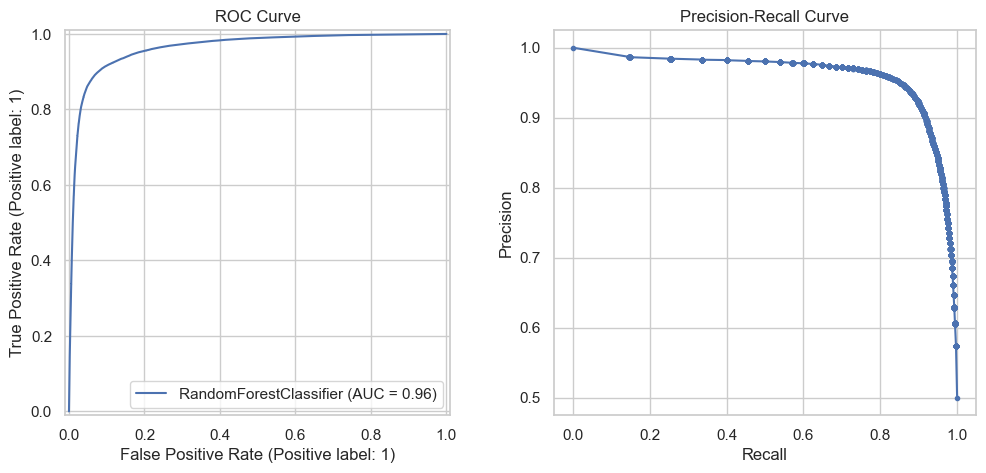


Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.91      0.91      0.91     58485
   High Risk       0.91      0.91      0.91     58484

    accuracy                           0.91    116969
   macro avg       0.91      0.91      0.91    116969
weighted avg       0.91      0.91      0.91    116969


Evaluating XGBoost


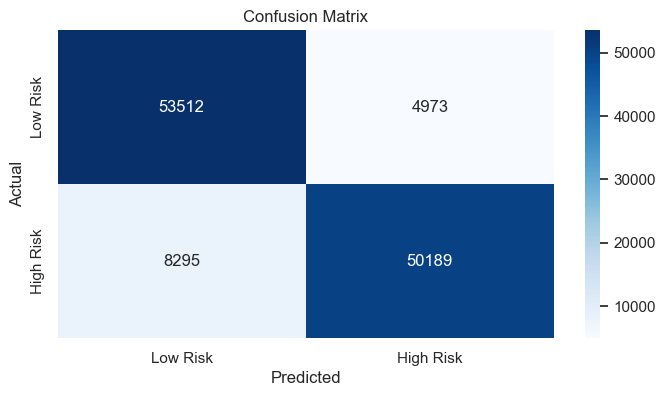

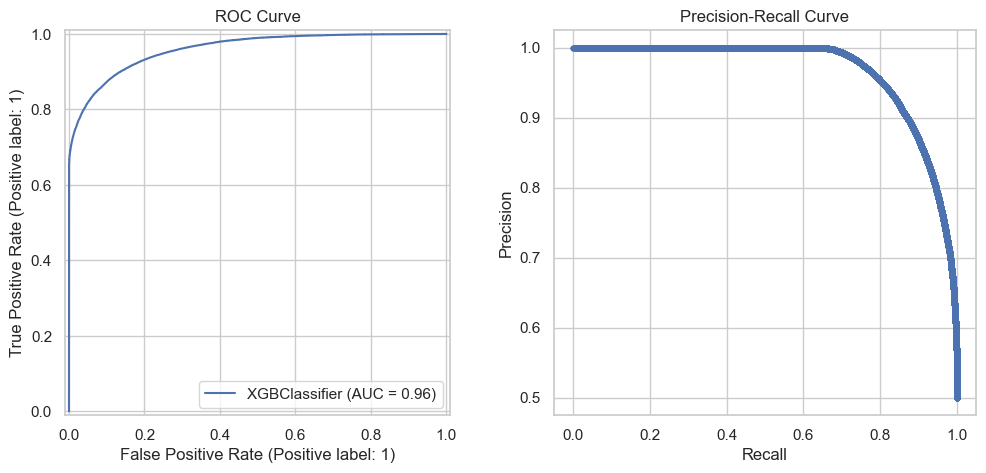


Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.87      0.91      0.89     58485
   High Risk       0.91      0.86      0.88     58484

    accuracy                           0.89    116969
   macro avg       0.89      0.89      0.89    116969
weighted avg       0.89      0.89      0.89    116969


Evaluating Gradient Boosting


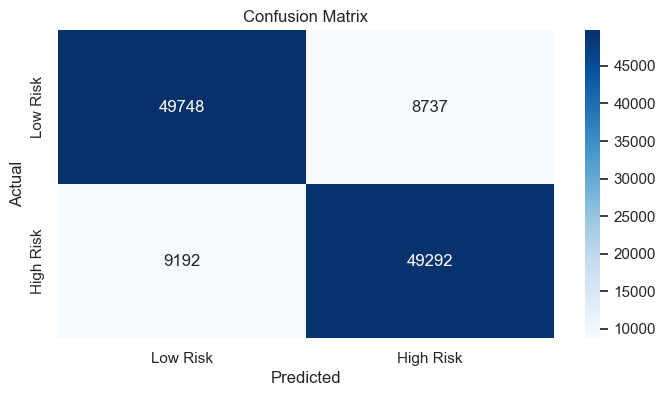

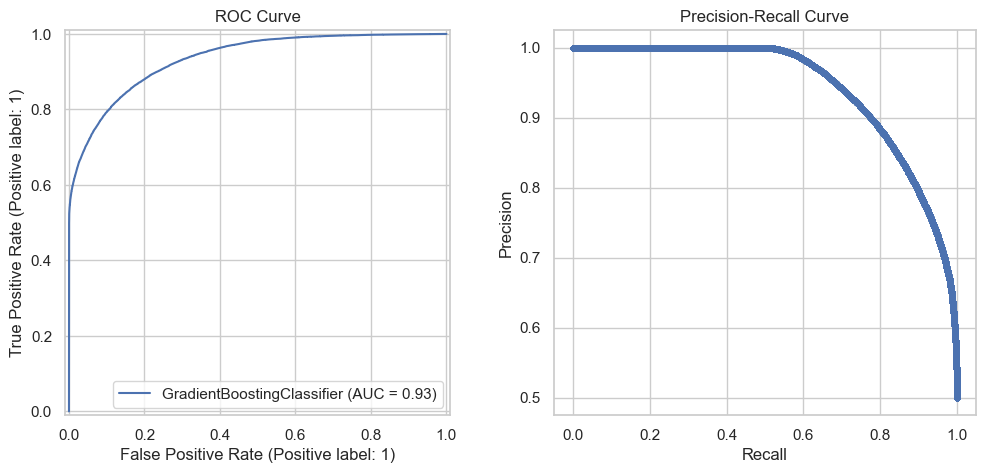


Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.84      0.85      0.85     58485
   High Risk       0.85      0.84      0.85     58484

    accuracy                           0.85    116969
   macro avg       0.85      0.85      0.85    116969
weighted avg       0.85      0.85      0.85    116969


Evaluating KNN


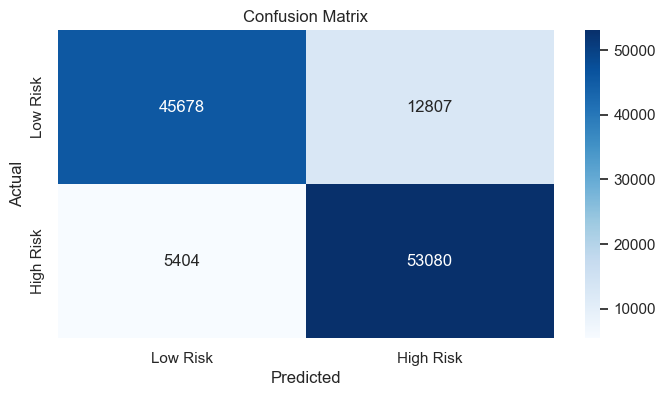

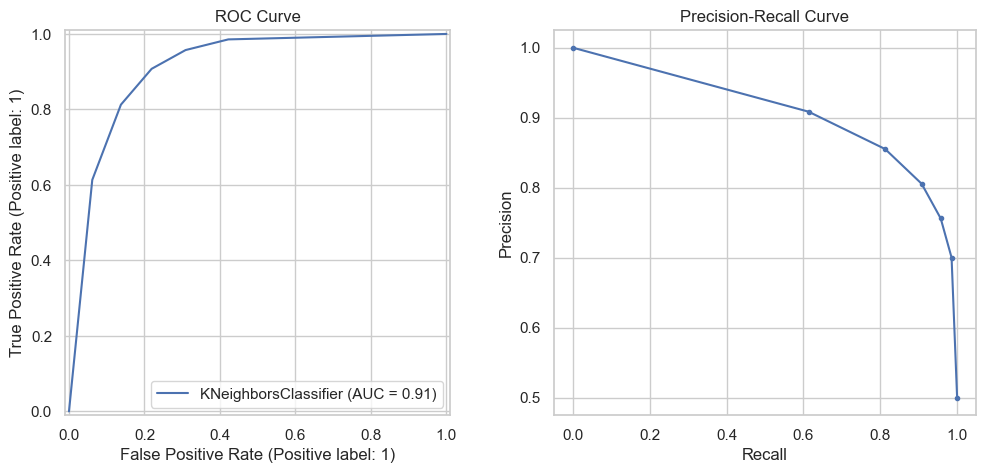


Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.89      0.78      0.83     58485
   High Risk       0.81      0.91      0.85     58484

    accuracy                           0.84    116969
   macro avg       0.85      0.84      0.84    116969
weighted avg       0.85      0.84      0.84    116969


Model Performance Comparison:


,Accuracy,Precision,Recall,F1 Score,ROC AUC,PR AUC
Model,,,,,,
Random Forest,0.909301,0.906319,0.912968,0.909631,0.962845,0.959290
XGBoost,0.886568,0.909847,0.858166,0.883252,0.960001,0.966107
Gradient Boosting,0.846720,0.849437,0.842829,0.846120,0.934610,0.942888
KNN,0.844309,0.805622,0.907599,0.853575,0.910562,0.868780
Logistic Regression,0.757115,0.745992,0.779718,0.762482,0.832441,0.810370


In [153]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, precision_recall_curve, 
                           average_precision_score, RocCurveDisplay)

def evaluate_model(model, X_test, y_test):
    """Generate comprehensive evaluation metrics"""
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    # Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba),
        'PR AUC': average_precision_score(y_test, y_proba)
    }
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, fmt='d', cmap='Blues',
                xticklabels=['Low Risk', 'High Risk'],
                yticklabels=['Low Risk', 'High Risk'])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Plot ROC and PR curves
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax1)
    ax1.set_title('ROC Curve')
    
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ax2.plot(recall, precision, marker='.')
    ax2.set_title('Precision-Recall Curve')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    plt.show()
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, 
                               target_names=['Low Risk', 'High Risk']))
    
    return metrics

# Evaluate all models
results = []
for name, model in models.items():
    print(f"\n{'='*40}\nEvaluating {name}\n{'='*40}")
    metrics = evaluate_model(model, X_test, y_test)
    metrics['Model'] = name
    results.append(metrics)

# Compare all models
results_df = pd.DataFrame(results).set_index('Model')
print("\nModel Performance Comparison:")
display(results_df.sort_values('ROC AUC', ascending=False))

**Feature Importance Analysis**

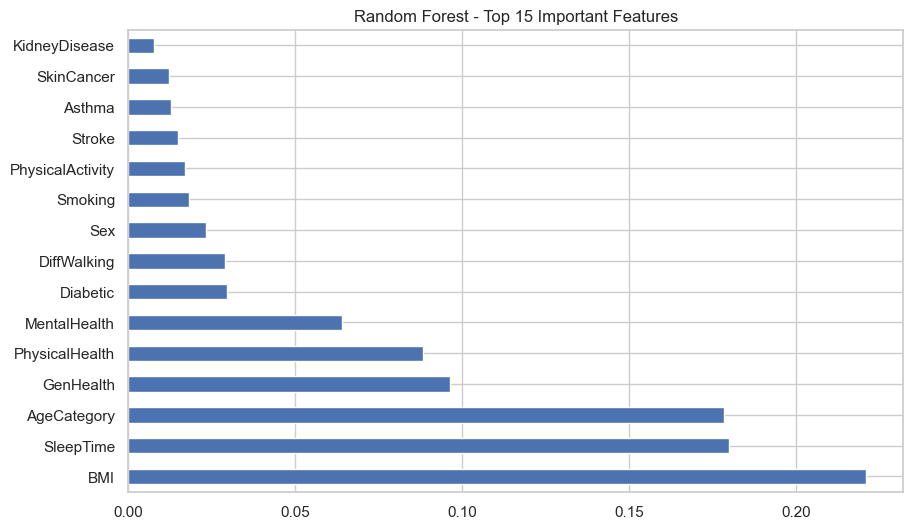

In [154]:
# Get best model based on ROC AUC
best_model_name = results_df['ROC AUC'].idxmax()
best_model = models[best_model_name]

# Plot feature importance
plt.figure(figsize=(10, 6))
if hasattr(best_model, 'feature_importances_'):
    # For tree-based models
    importances = best_model.feature_importances_
    feat_importances = pd.Series(importances, index=X.columns)
    feat_importances.nlargest(15).plot(kind='barh')
    plt.title(f'{best_model_name} - Top 15 Important Features')
elif hasattr(best_model, 'coef_'):
    # For linear models
    coef = pd.Series(best_model.coef_[0], index=X.columns)
    coef.abs().nlargest(15).plot(kind='barh')
    plt.title(f'{best_model_name} - Top 15 Most Influential Features')
plt.show()

 **Hyperparameter Tuning**


Tuning Random Forest...
Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best ROC AUC: 0.9644151232949337

Tuned Model Evaluation:


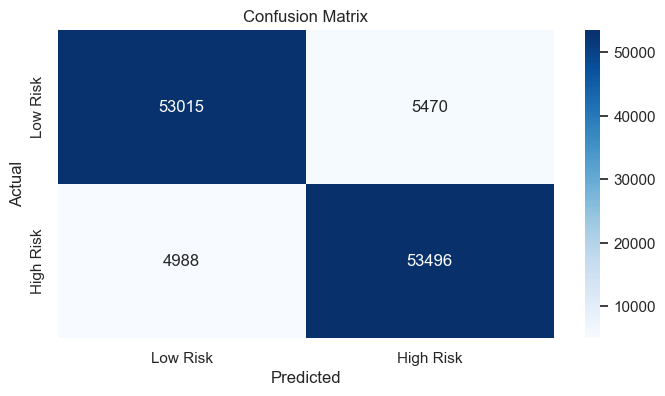

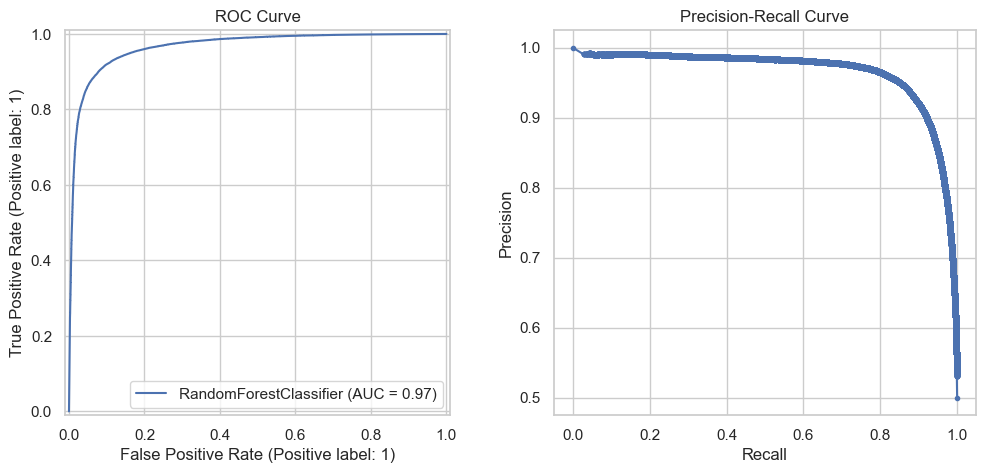


Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.91      0.91      0.91     58485
   High Risk       0.91      0.91      0.91     58484

    accuracy                           0.91    116969
   macro avg       0.91      0.91      0.91    116969
weighted avg       0.91      0.91      0.91    116969



In [155]:
from sklearn.model_selection import GridSearchCV

if isinstance(best_model, RandomForestClassifier):
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'class_weight': ['balanced', None]
    }
elif isinstance(best_model, XGBClassifier):
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0]
    }
else:
    param_grid = {}  # Skip tuning if not implemented

if param_grid:
    print(f"\nTuning {best_model_name}...")
    grid_search = GridSearchCV(best_model, param_grid, cv=5, 
                             scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    print("Best parameters:", grid_search.best_params_)
    print("Best ROC AUC:", grid_search.best_score_)
    
    # Re-evaluate with tuned model
    print("\nTuned Model Evaluation:")
    evaluate_model(best_model, X_test, y_test)

# Saving Model and Scaler

**Load Normalized Data**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the normalized data from the CSV file
df = pd.read_csv('normalized_data.csv')

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.055294,1,0,0,0.100000,1.0,0,0,7,1,1,3,0.173913,1,0,1
1,0,0.100447,0,0,1,0.000000,0.0,0,0,12,0,1,3,0.260870,0,0,0
2,0,0.175782,1,0,0,0.666667,1.0,0,1,9,1,1,1,0.304348,1,0,0
3,0,0.147169,0,0,0,0.000000,0.0,0,0,11,0,0,2,0.217391,0,0,1
4,0,0.141132,0,0,0,0.933333,0.0,1,0,4,0,1,3,0.304348,0,0,0


**Save model and scaler**

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import joblib


# Define features to scale
features_to_scale = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Scale features
scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Save the scaler for later use
joblib.dump(scaler, 'minmax_scaler.pkl')



model = RandomForestClassifier(
    n_estimators=30,        # reduced from hundreds
    max_depth=8,            # shallower trees
    max_features='sqrt',    # fewer features per split
    random_state=42
)

# Retrain (if you have the original data)
model.fit(X_train, y_train)

# Save with compression
joblib.dump(model, 'heart_disease_model.pkl', compress=3)


print("Model and scaler saved successfully!")

Model and scaler saved successfully!
